In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score

In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
features = data[['zALFF', 'zfALFF', 'zReHo']]
target = data['组']

In [4]:
parameters = {
    'C':[0.1, 1, 10],
    'kernel':['linear', 'rbf', 'sigmoid','poly'],
    'gamma':[0.1, 1]
}

In [5]:
cv = 5

In [6]:
clf = SVC(probability=True)
grid_search = GridSearchCV(clf, parameters, cv = cv)

In [7]:
acc_list = []
sen_list = []
spe_list = []
auc_list = []

In [8]:
n = 1000;

for epoch in range(n):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = epoch)
    
    grid_search.fit(X_train, y_train)

#     best_params = grid_search.best_params_

    y_pred = grid_search.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    sen = recall_score(y_test, y_pred)
    spe = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
#     if len(acc)
    acc_list.append(acc)
    sen_list.append(sen)
    spe_list.append(spe)
    auc_list.append(auc)

#     print(f"Epoch {epoch + 1}: ACC={acc:.4f}, SEN={sen:.4f}, SPE={spe:.4f}, AUC={auc:.4f}")    

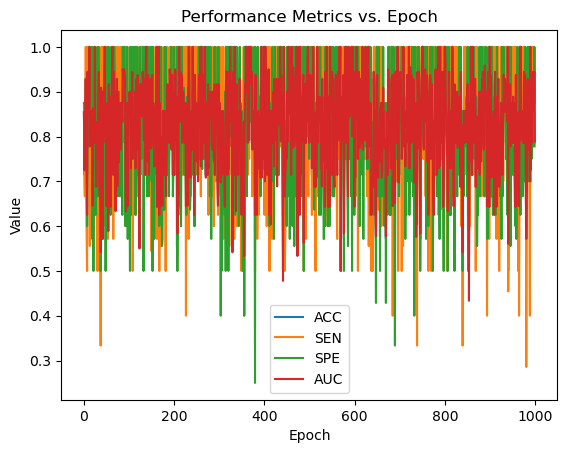

In [9]:
epochs = [i for i in range(len(acc_list))]
# print(acc_list)

plt.plot(epochs, acc_list, label='ACC')
plt.plot(epochs, sen_list, label='SEN')
plt.plot(epochs, spe_list, label='SPE')
plt.plot(epochs, auc_list, label='AUC')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Performance Metrics vs. Epoch')
plt.legend()
plt.show()

In [10]:
acc_aver = sum(acc_list) / len(acc_list)
sen_aver = sum(sen_list) / len(sen_list)
spe_aver = sum(spe_list) / len(spe_list)
auc_aver = sum(auc_list) / len(auc_list)

print(f"AVERAGE: ACC = {acc_aver:.4f}, SEN = {sen_aver:.4f}, SPE = {spe_aver:.4f}, AUC = {auc_aver:.4f}")

AVERAGE: ACC = 0.8256, SEN = 0.8419, SPE = 0.8198, AUC = 0.8287


In [11]:
best_params = grid_search.best_params_
clf = SVC(**best_params)
clf.fit(features, target)

SVC(C=10, gamma=1)

In [12]:
print(clf.kernel)

rbf


In [16]:
y_true = data['组']
y_score = grid_search.predict_proba(X_test)[:,1]

array([0.70878697, 0.73226468, 0.7429161 , 0.24882773, 0.30596871,
       0.8499959 , 0.87402224, 0.83526487, 0.13248988, 0.39687829,
       0.20830793, 0.51972315, 0.77954788, 0.27157008])